In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from fitter import Fitter, get_common_distributions, get_distributions

In [2]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

In [3]:
url = "/bigdata/jelicicna/output_datasets/anlysis_data_nextbike_2021-01.csv.gz"
df = pd.read_csv(url, sep=';', low_memory=False)

# Distances Analysis

### Inital view of the data

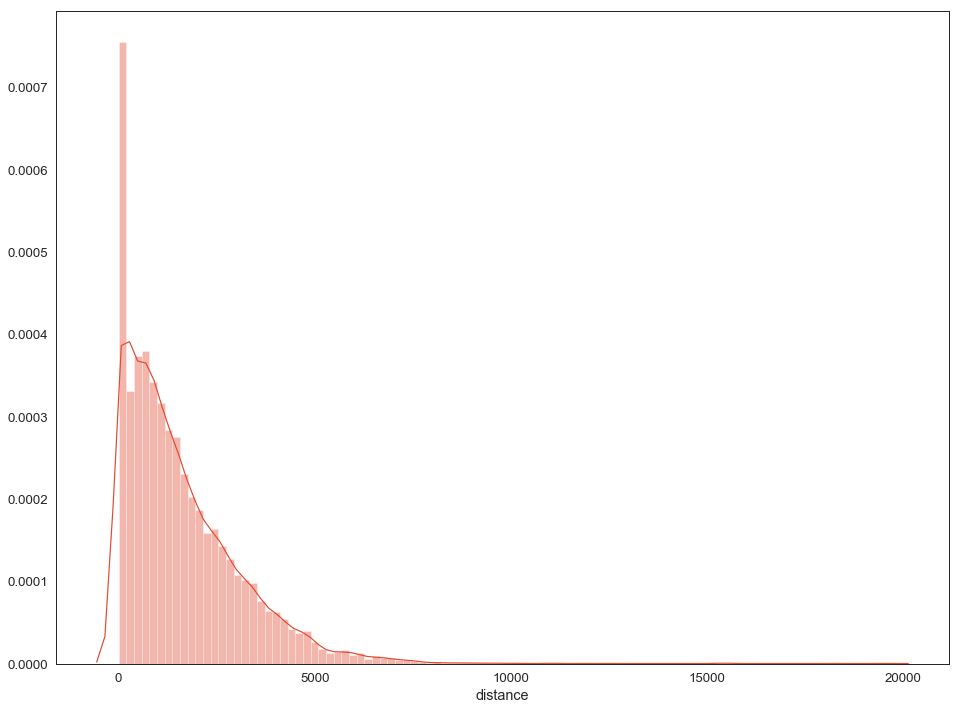

In [4]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df['distance'], bins = 100)

### Droping 1 minute rides

In [6]:
dfc = df[df.ride_time != 1]

In [7]:
distance = dfc["distance"].values

#### 5 common distributions

,aic,bic,kl_div,sumsquare_error
beta,3217.681064,-726429.625225,inf,2.831229e-08
gamma,2686.354212,-719095.591465,inf,3.740887e-08
norm,6245.431673,-667976.703965,inf,2.602269e-07
lognorm,2461.350429,-638211.667549,inf,8.045974e-07
burr,2366.755157,-636612.442884,inf,8.545923e-07


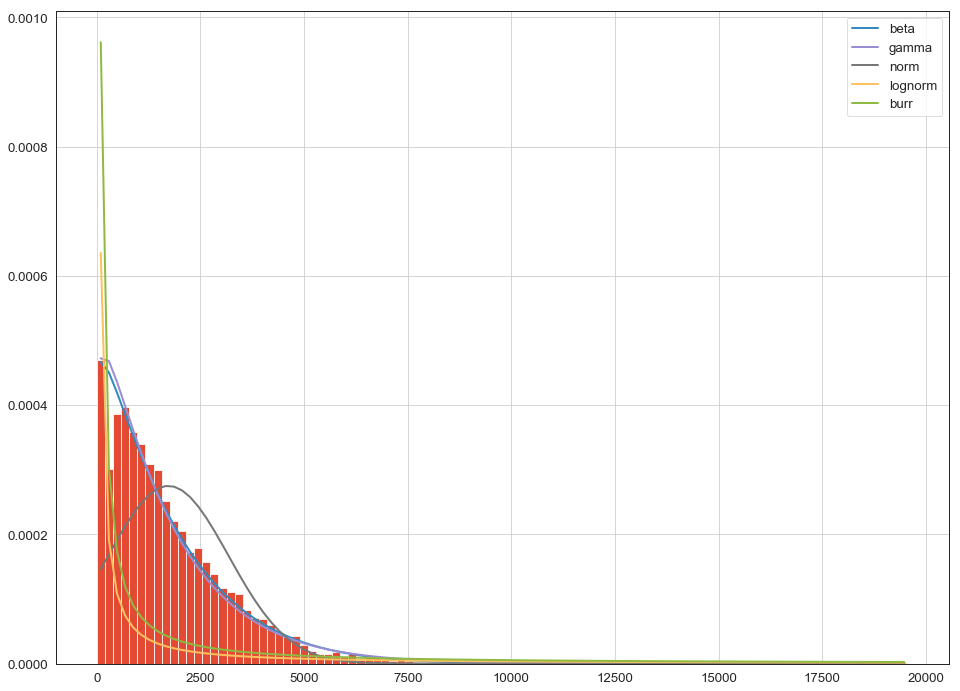

In [8]:
f = Fitter(distance,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [9]:
f.get_best(method = 'sumsquare_error')

{'beta': (1.0615455713655315,
  11.965296798342216,
  -0.0030988547632259944,
  21129.012954795253)}

In [10]:
f.get_best(method = 'aic')

{'burr': (0.29351377975611354,
  3.382509929815784,
  -1.0697884409226099e-26,
  1.174428596761983)}

In [11]:
f.get_best(method = 'bic')

{'beta': (1.0615455713655315,
  11.965296798342216,
  -0.0030988547632259944,
  21129.012954795253)}

### Fitting distributions with regards to the result of 5 from above including variety of common distributions

,aic,bic,kl_div,sumsquare_error
beta,3217.681064,-726429.625225,inf,2.831229e-08
norm,6245.431673,-667976.703965,inf,2.602269e-07
bradford,2084.534977,-666118.791106,inf,2.791223e-07
burr,2366.755157,-636612.442884,inf,8.545923e-07
alpha,3402.806252,-628151.342880,inf,1.178495e-06


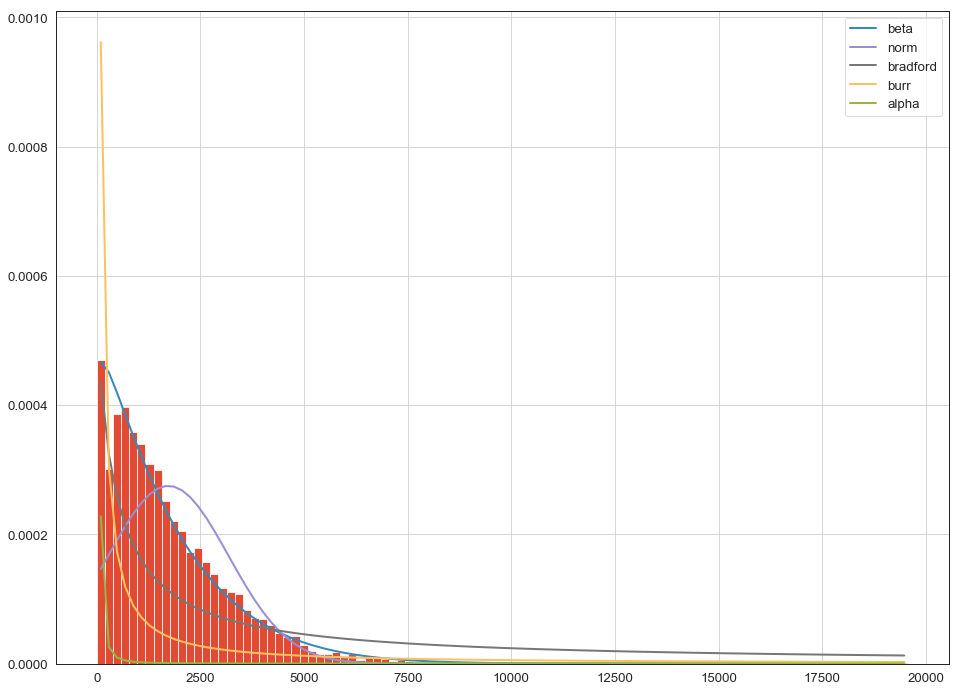

In [12]:
f = Fitter(distance,
           distributions= ['alpha','beta','norm','bradford','burr'])
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
chi,3732.389764,-733110.871444,inf,2.198192e-08
expon,2627.533917,-708128.911802,inf,5.673146e-08
chi2,3700.908310,-691626.692544,inf,1.060569e-07
dgamma,3358.642372,-674617.076128,inf,2.021999e-07
cosine,inf,-640995.869674,inf,7.242278e-07


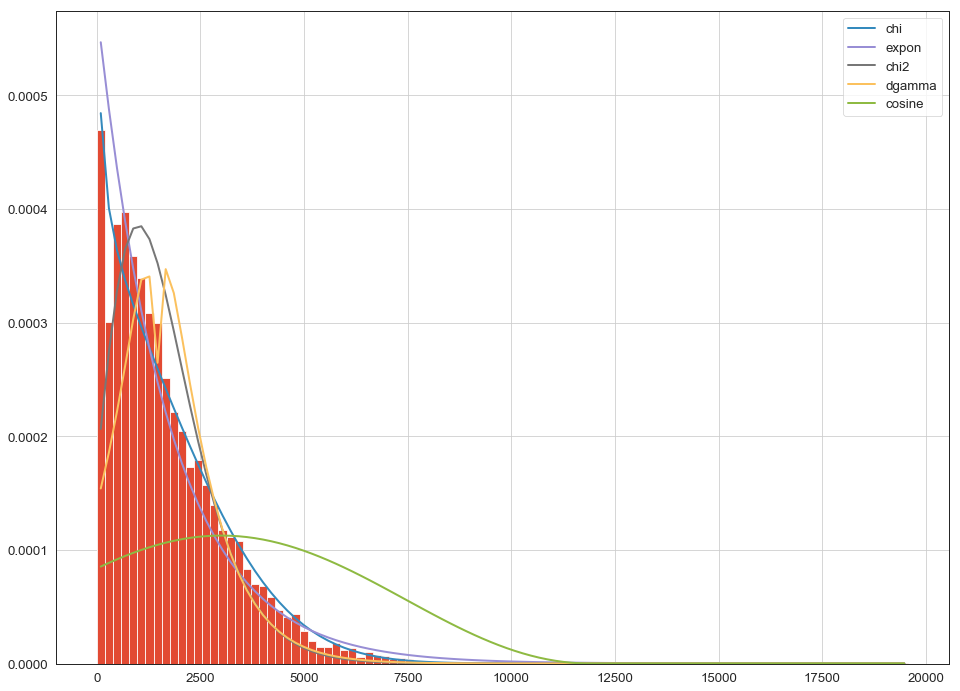

In [13]:
f = Fitter(distance,
           distributions= ['chi','chi2','cosine','dgamma','expon'])
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
gamma,2686.354212,-719095.591465,inf,3.740887e-08
exponnorm,2634.087226,-707447.286139,inf,5.819510e-08
fatiguelife,2523.391254,-652848.312178,inf,4.617771e-07
fisk,2512.532387,-636681.901577,inf,8.526726e-07
f,2490.453839,-636488.100525,inf,8.586330e-07


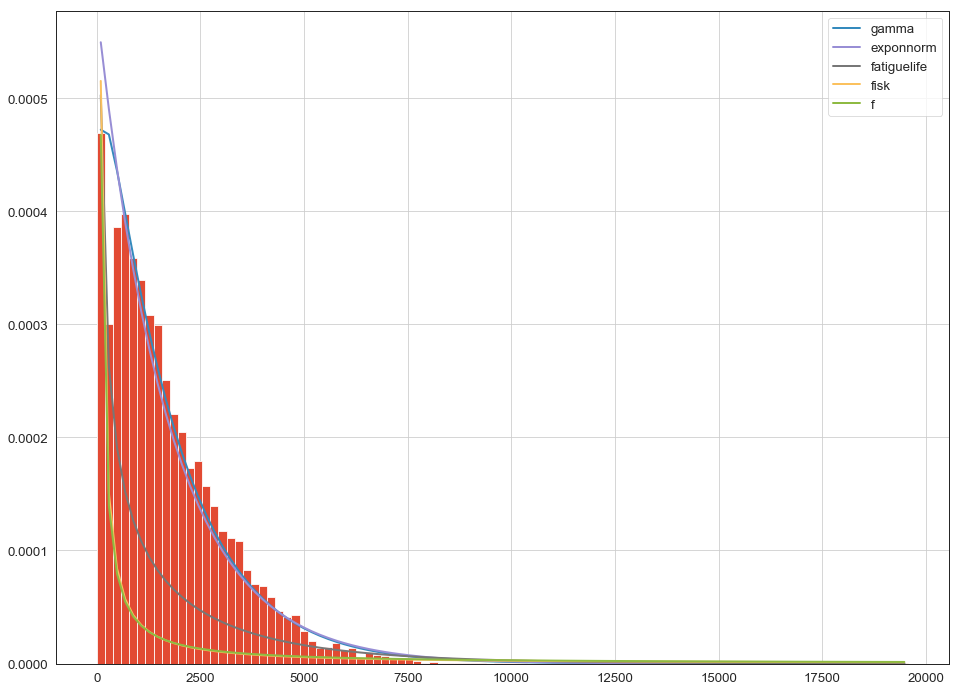

In [14]:
f = Fitter(distance,
           distributions= ['exponnorm','f','fatiguelife','fisk','gamma'])
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
genexpon,2633.594459,-708090.363085,inf,5.674870e-08
loggamma,6524.397967,-667548.456424,inf,2.643870e-07
levy,2223.393751,-666312.440677,inf,2.771863e-07
lognorm,2461.350429,-638211.667549,inf,8.045974e-07
gengamma,2366.603990,-608751.184660,inf,2.459164e-06


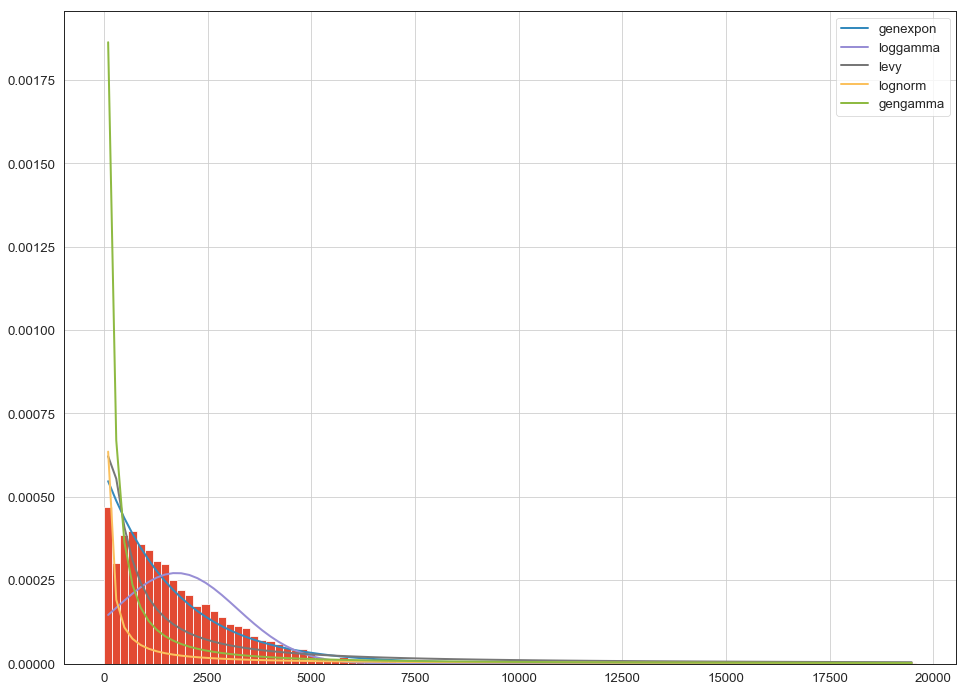

In [15]:
f = Fitter(distance,
           distributions= ['genexpon','gengamma','levy','loggamma','lognorm'])
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
pearson3,2686.354331,-719095.590918,inf,3.740887e-08
logistic,3508.412943,-671931.673623,inf,2.239711e-07
t,3050.825484,-670730.010671,inf,2.343270e-07
powerlaw,2068.360337,-654271.919848,inf,4.374997e-07
pareto,2400.288058,-636053.663364,inf,8.732384e-07


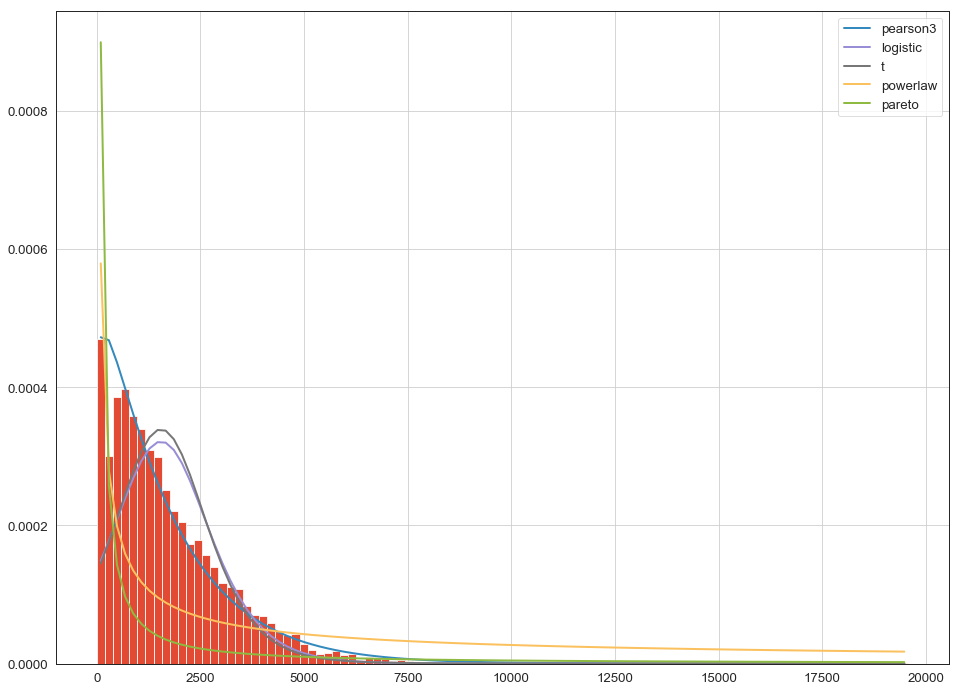

In [16]:
f = Fitter(distance,
           distributions= ['logistic','pareto','pearson3','powerlaw','t'])
f.fit()
f.summary()

### 5 best distributions chosen from the above analysis

,aic,bic,kl_div,sumsquare_error
chi,3732.389764,-733110.871444,inf,2.198192e-08
beta,3217.681064,-726429.625225,inf,2.831229e-08
gamma,2686.354212,-719095.591465,inf,3.740887e-08
pearson3,2686.354331,-719095.590918,inf,3.740887e-08
genexpon,2633.594459,-708090.363085,inf,5.674870e-08


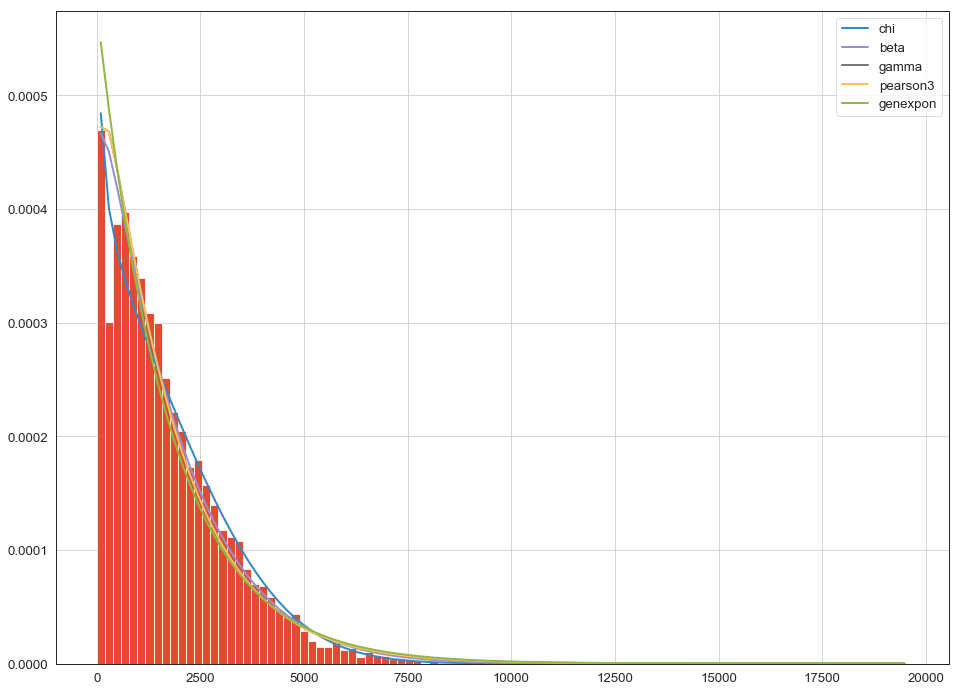

In [18]:
f = Fitter(distance,
           distributions= ['beta','chi','gamma','genexpon','pearson3'])
f.fit()
f.summary()

### 5 best distributions without 1 min drop

In [19]:
distance2 = df["distance"].values

,aic,bic,kl_div,sumsquare_error
chi,3588.779874,-795483.171763,inf,3.485181e-08
beta,2686.530481,-778606.296142,inf,6.236680e-08
gamma,2632.835487,-777781.432949,inf,6.418996e-08
pearson3,2648.700004,-776766.071163,inf,6.647850e-08
genexpon,3062.814310,-771807.916291,inf,7.882536e-08


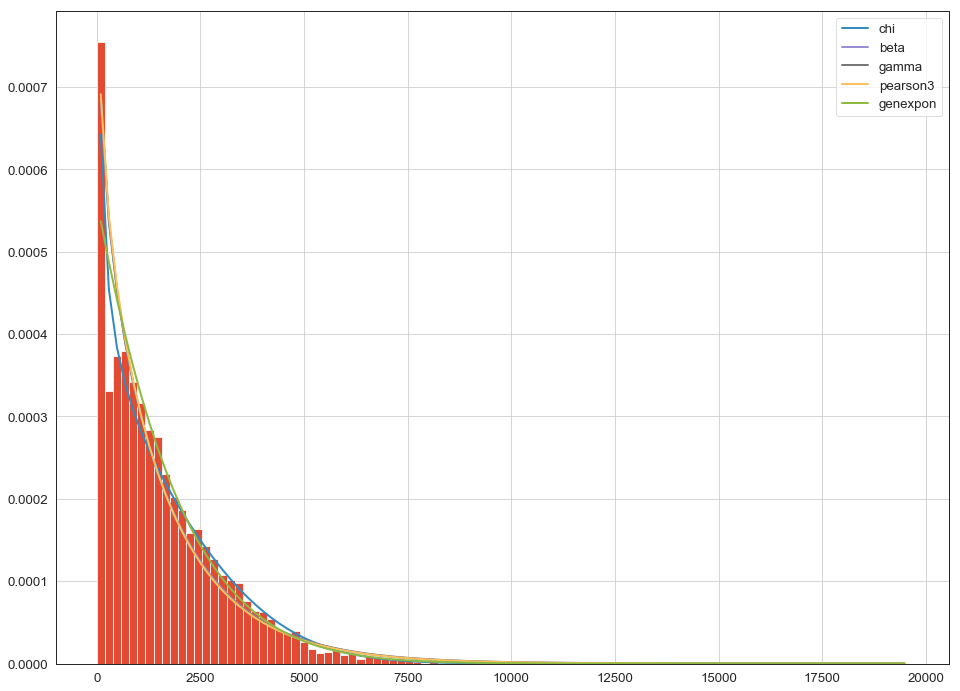

In [21]:
f = Fitter(distance2,
           distributions=['beta','chi','gamma','genexpon','pearson3'])
f.fit()
f.summary()

## Rides Analysis

### Inital view of the data

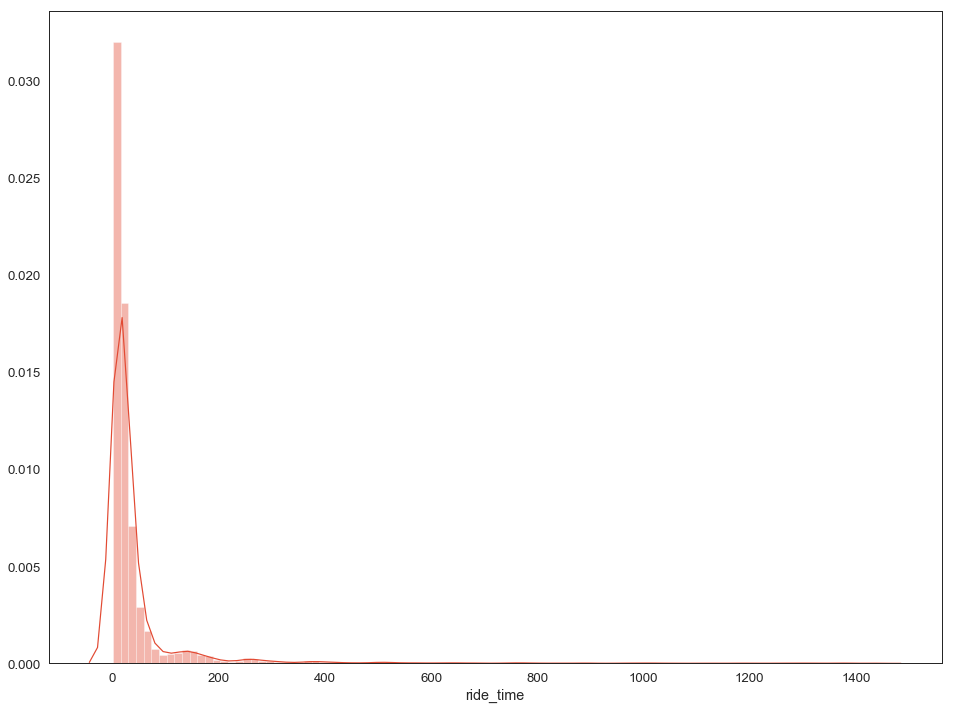

In [23]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df['ride_time'], bins = 100)

### Using data without 1 min rides

In [24]:
rides = dfc["ride_time"].values

#### 5 common distributions

,aic,bic,kl_div,sumsquare_error
lognorm,2358.978220,-541694.759165,0.052135,0.000031
burr,2151.954041,-505551.823653,0.035407,0.000123
beta,3137.607336,-493990.612843,0.213083,0.000191
norm,5349.939289,-449054.909265,1.136763,0.001052
gamma,37986.317318,-442772.081318,0.783367,0.001335


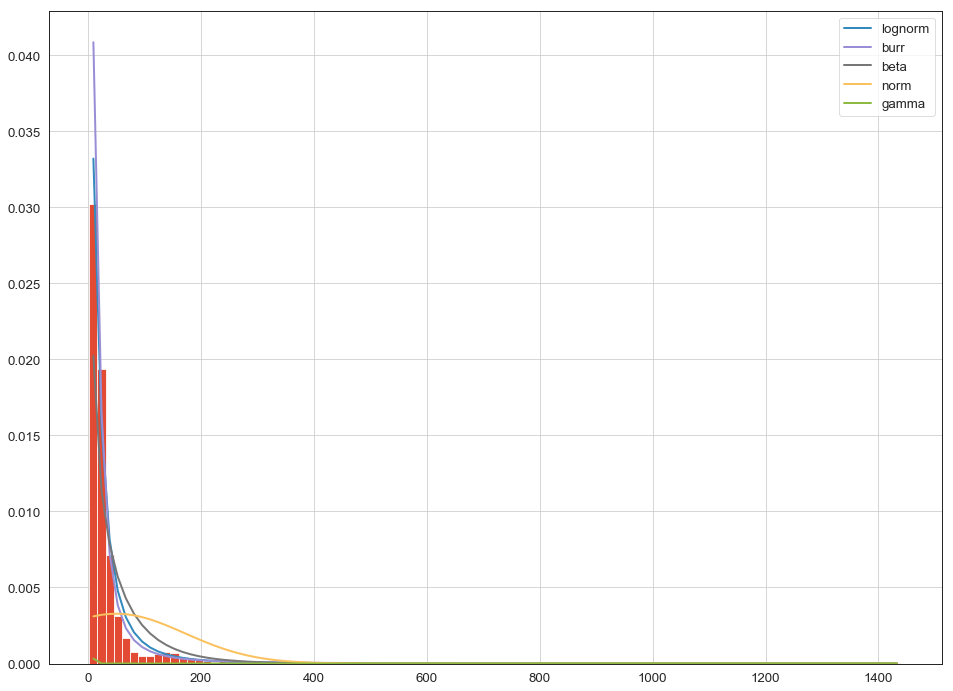

In [25]:
f = Fitter(rides,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [26]:
f.get_best(method = 'sumsquare_error')

{'lognorm': (1.1656826071144, 1.8158664237302893, 19.13227699970313)}

In [28]:
f.get_best(method = 'aic')

{'burr': (1.3285459924599845,
  26.25169978119115,
  0.005061451576610924,
  1.0874769467083016)}

In [29]:
f.get_best(method = 'bic')

{'lognorm': (1.1305539126211785, 1.8889370760227786, 16.60689097350282)}

### Fitting distributions with regards to the result of 5 from above including variety of common distributions

,aic,bic,kl_div,sumsquare_error
beta,6662.322878,-1.226934e+06,0.094293,0.000037
burr,2208.484938,-1.141062e+06,0.027943,0.000164
alpha,2147.312224,-1.124067e+06,0.030232,0.000220
norm,5981.038017,-1.023896e+06,1.212399,0.001237
bradford,1473.039355,-1.015132e+06,2.532558,0.001439


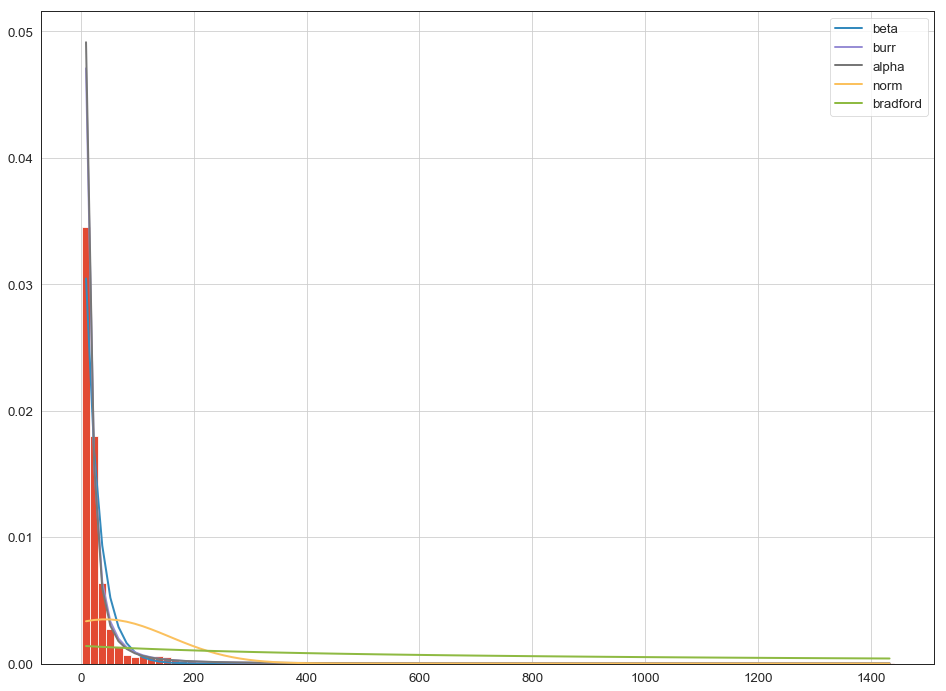

In [30]:
f = Fitter(rides,
           distributions= ['alpha','beta','norm','bradford','burr'])
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
expon,4238.344297,-1.111035e+06,0.261794,0.000275
dgamma,3039.319728,-1.084073e+06,0.095288,0.000438
chi,5065.430191,-1.074225e+06,0.500561,0.000519
chi2,1887.838510,-1.070373e+06,0.528650,0.000555
cosine,1653.306293,-1.012961e+06,2.585916,0.001494


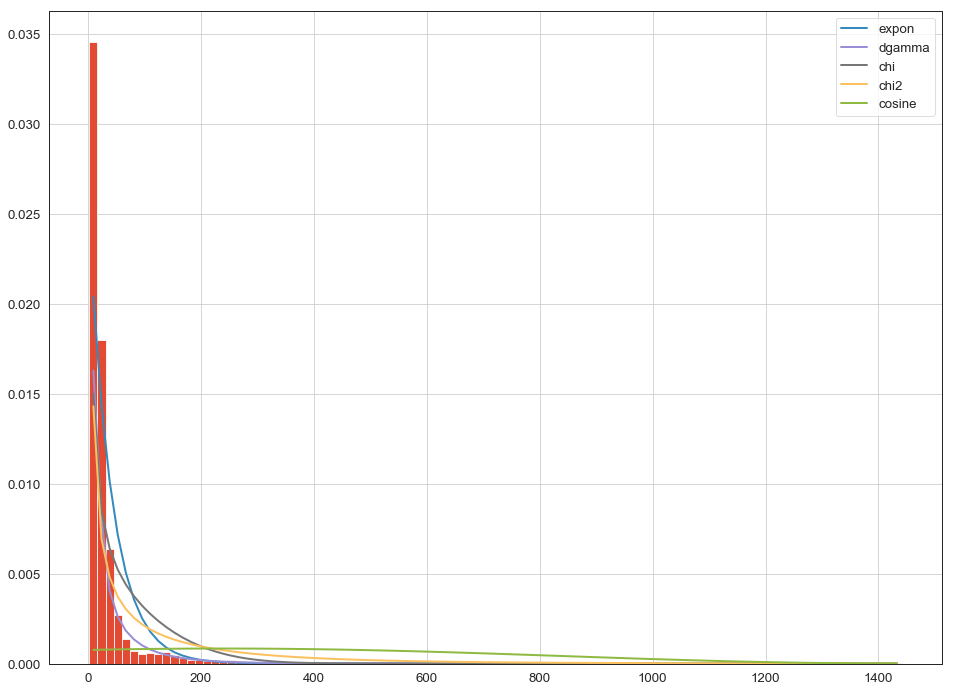

In [31]:
f = Fitter(rides,
           distributions= ['chi','chi2','cosine','dgamma','expon'])
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
fisk,2338.267954,-1.236112e+06,0.022727,0.000032
fatiguelife,2849.929050,-1.199512e+06,0.121564,0.000060
f,2213.603339,-1.150207e+06,0.026987,0.000140
gamma,4284.555139,-1.145368e+06,0.165541,0.000152
exponnorm,4368.149690,-1.120539e+06,0.244023,0.000234


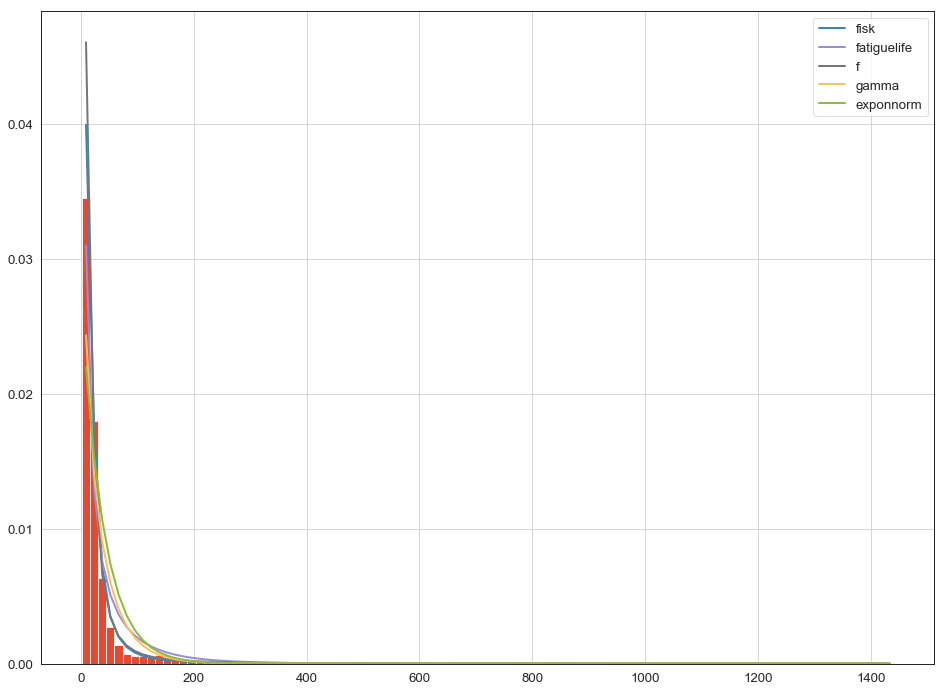

In [32]:
f = Fitter(rides,
           distributions= ['exponnorm','f','fatiguelife','fisk','gamma'])
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
lognorm,2483.675699,-1.265464e+06,0.039899,0.000019
levy,1841.922725,-1.181343e+06,0.126852,0.000082
gengamma,2722.181044,-1.144347e+06,0.142157,0.000155
genexpon,4334.824913,-1.117274e+06,0.249867,0.000247
loggamma,5798.544840,-1.023108e+06,1.250302,0.001254


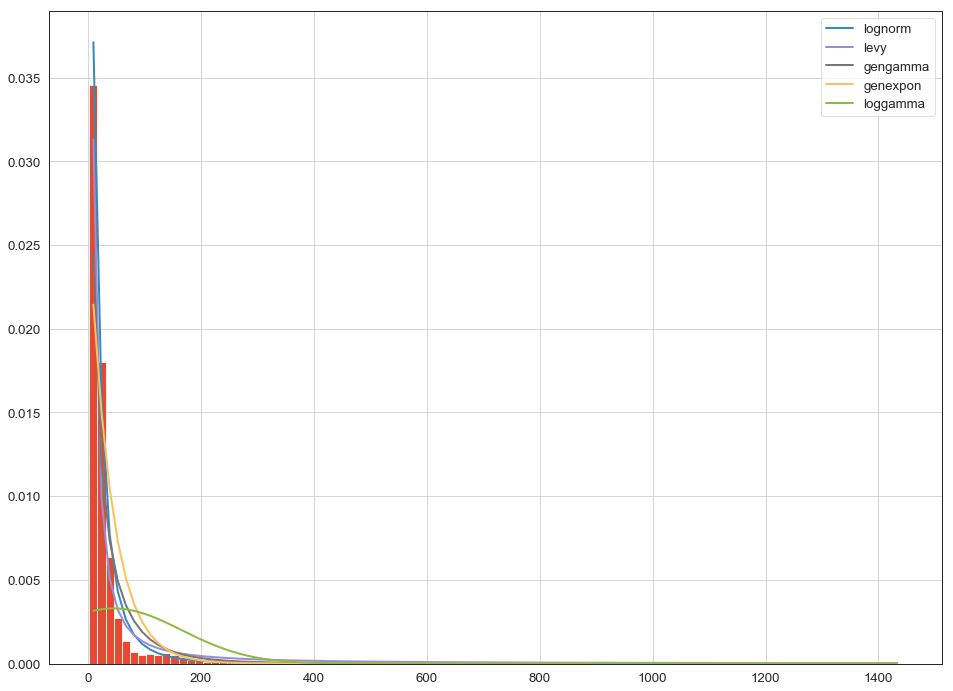

In [33]:
f = Fitter(rides,
           distributions= ['genexpon','gengamma','levy','loggamma','lognorm'])
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
t,2308.107471,-1.228058e+06,0.027135,0.000037
pearson3,4781.808969,-1.164014e+06,0.137524,0.000110
pareto,1918.088659,-1.116802e+06,0.121618,0.000249
logistic,5909.812810,-1.049372e+06,0.549178,0.000797
powerlaw,1617.417612,-1.044421e+06,1.144680,0.000868


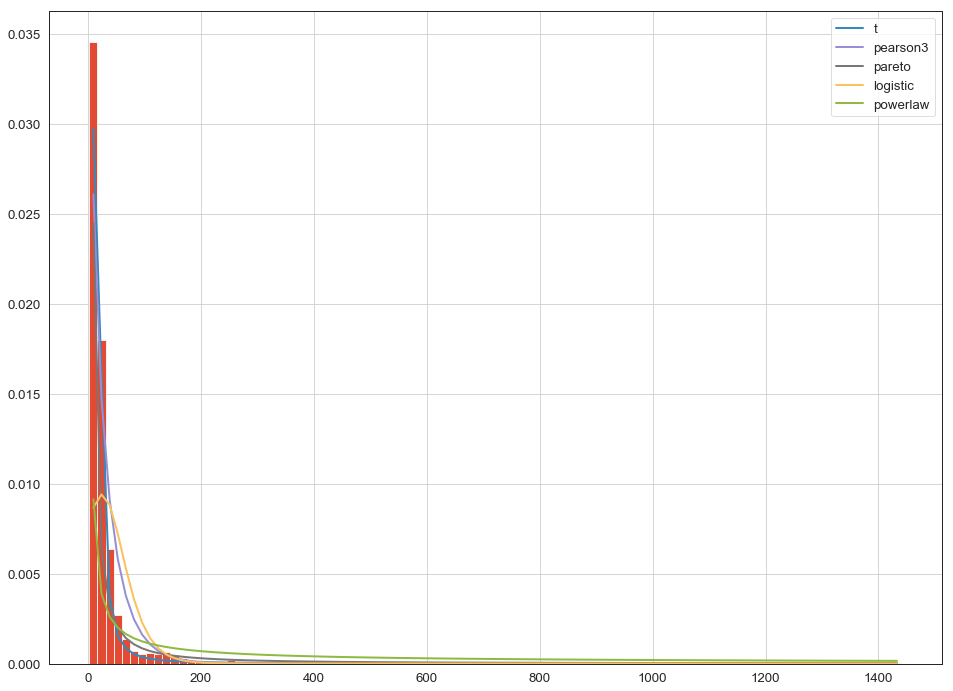

In [34]:
f = Fitter(rides,
           distributions= ['logistic','pareto','pearson3','powerlaw','t'])
f.fit()
f.summary()

### 5 best distributions chosen from the above analysis

,aic,bic,kl_div,sumsquare_error
lognorm,2483.675699,-1.265464e+06,0.039899,0.000019
fisk,2338.267954,-1.236112e+06,0.022727,0.000032
t,2308.107471,-1.228058e+06,0.027135,0.000037
beta,6662.322878,-1.226934e+06,0.094293,0.000037
expon,4238.344297,-1.111035e+06,0.261794,0.000275


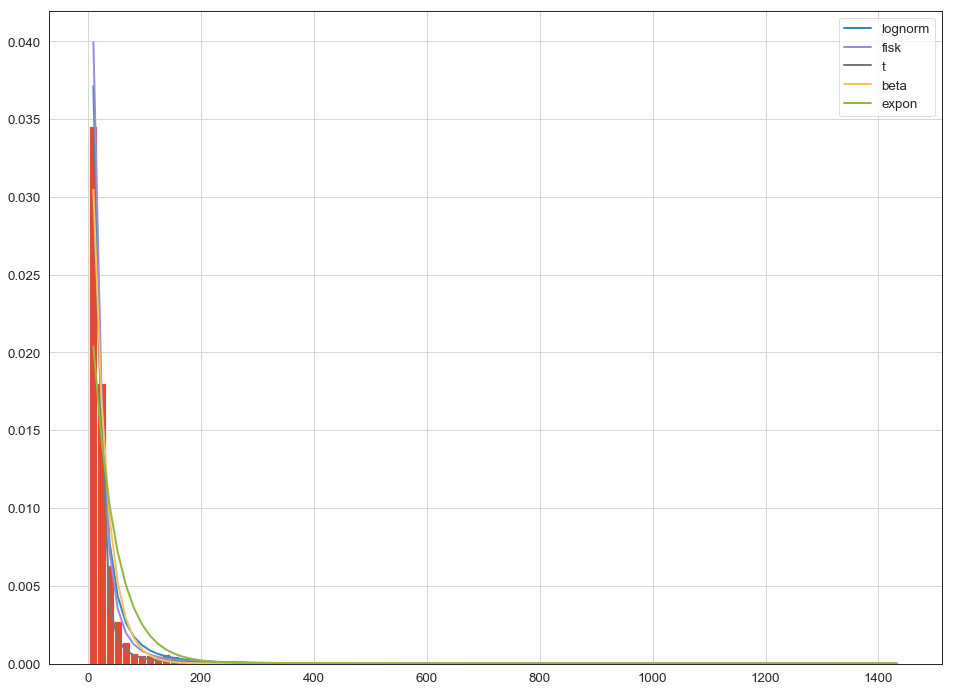

In [35]:
f = Fitter(rides,
           distributions= ['beta','expon','fisk','lognorm','t'])
f.fit()
f.summary()

### 5 distributions without 1 min drop

In [33]:
rides2 = df["ride_time"].values

,aic,bic,kl_div,sumsquare_error
fisk,2242.170929,-1.408629e+06,0.021077,0.000013
lognorm,2370.129182,-1.366948e+06,0.043032,0.000025
t,2333.422741,-1.333028e+06,0.024113,0.000042
beta,5023.032335,-1.297452e+06,0.089900,0.000074
expon,4448.059211,-1.217510e+06,0.248420,0.000264


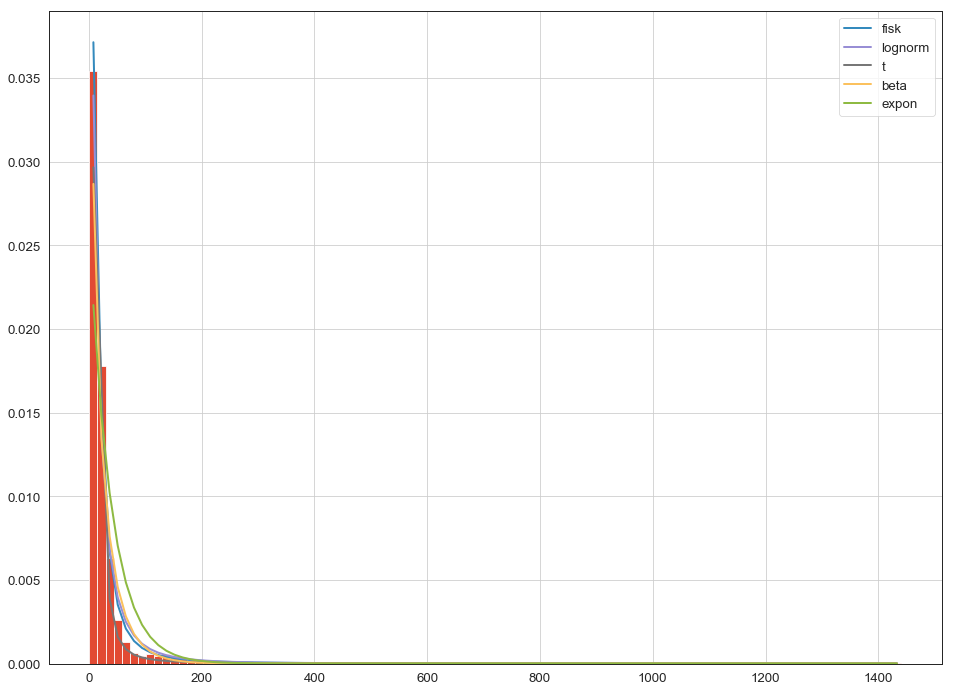

In [38]:
f = Fitter(rides2,
           distributions=['beta','expon','fisk','lognorm','t'])
f.fit()
f.summary()

In [27]:
f.get_best(method = 'sumsquare_error')

{'lognorm': (1.1656826071144, 1.8158664237302893, 19.13227699970313)}

In [28]:
f.get_best(method = 'aic')

{'burr': (1.2878436067970425,
  11.321556079374535,
  -0.02656318557572113,
  2.207923392888797)}

In [29]:
f.get_best(method = 'bic')

{'lognorm': (1.1656826071144, 1.8158664237302893, 19.13227699970313)}

# Appendix

,aic,bic,kl_div,sumsquare_error
beta,2686.530481,-778606.296142,inf,6.236680e-08
gamma,2632.835487,-777781.432949,inf,6.418996e-08
norm,6316.991582,-719474.995369,inf,4.800441e-07
burr,2373.957922,-713476.470647,inf,5.900037e-07
lognorm,2465.567790,-709318.170811,inf,6.812655e-07


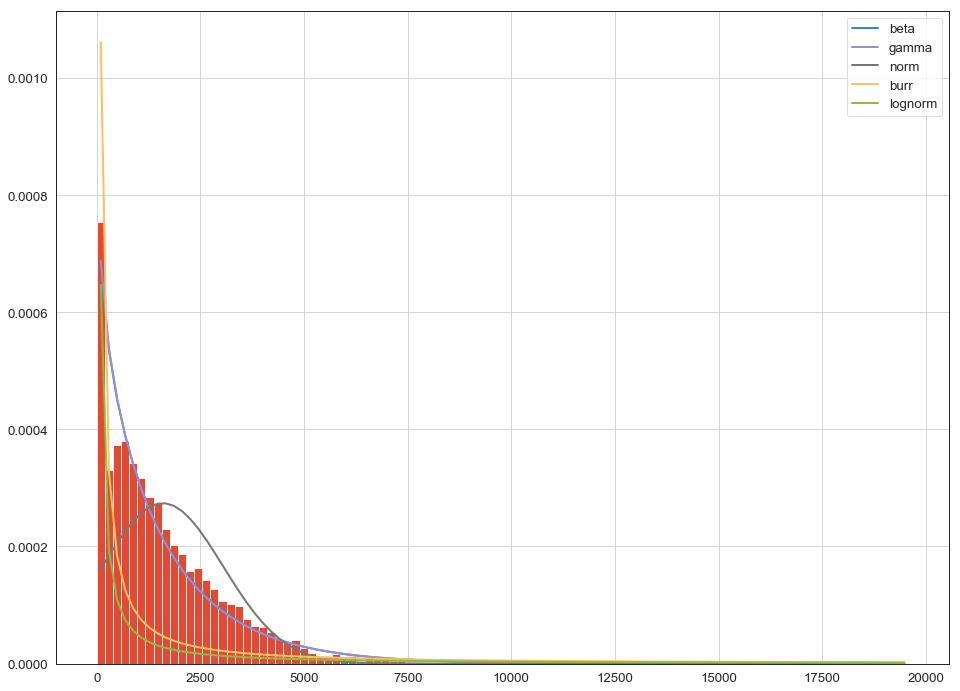

In [30]:
f = Fitter(distance2,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
beta,8261.056508,-597066.494671,0.088689,0.000033
lognorm,2245.690088,-594763.568986,0.051914,0.000035
burr,2246.838791,-584124.748180,0.039216,0.000051
norm,5734.546414,-494914.585346,1.162493,0.001112
gamma,38862.852358,-488140.178929,0.731226,0.001404


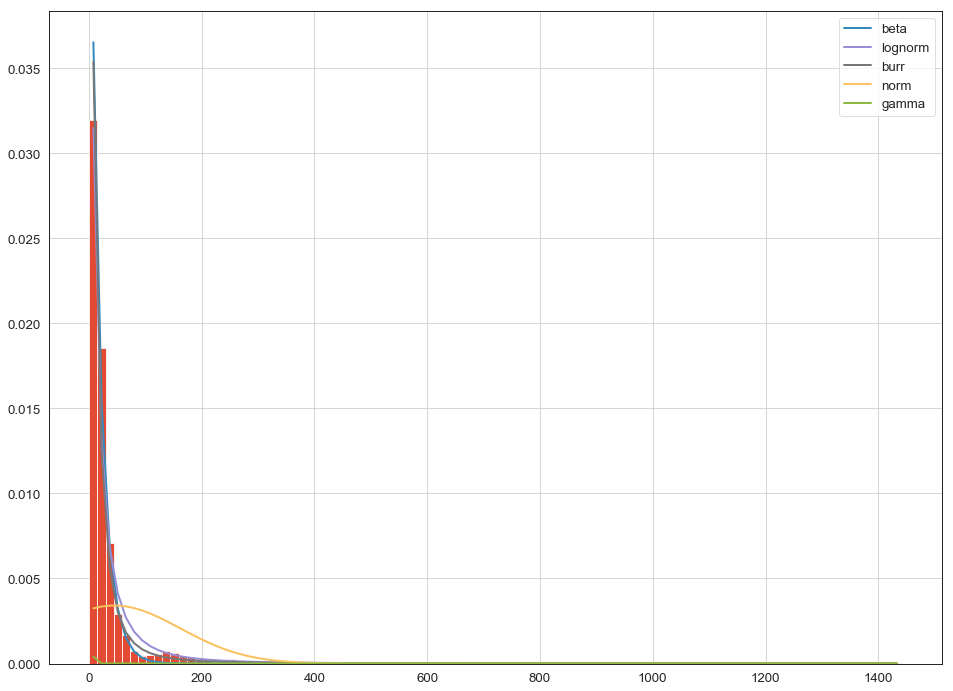

In [34]:
f = Fitter(rides2,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()